In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
iris = pd.read_csv('../data/iris.csv')

In [3]:
feature = iris[iris.columns[2:4]]
target = iris[iris.columns[-1]]

In [12]:
feature

,petal.length,petal.width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


In [4]:
target.replace({"iris-setosa": 0, "iris-versicolor":1, "iris-virginica":1}, inplace=True) # setosa / 다른 품종 비교 분류하기

In [5]:
from sklearn.svm import SVC

In [6]:
clf = SVC(kernel='linear', C=1)  # C값만 달라짐. 
clf.fit(feature, target)

SVC(C=1, kernel='linear')

In [8]:
w = clf.coef_[0] #가중치 : (-1.1, -0.7)
w

array([-1.1, -0.7])

In [11]:
l = -w[0] / w[1] #기울기 : -1.5714285....

In [13]:
j = np.linspace(feature[feature.columns[0]].min(), feature[feature.columns[0]].max()) #정의역: petal_length의 최소값 - 최대값

In [14]:
b = l * j - (clf.intercept_[0] / w[1]) # 경계 그리기..

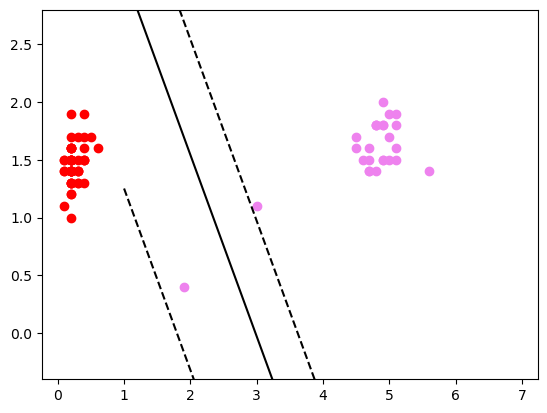

In [19]:
margin = 1/np.sqrt(np.sum(clf.coef_**2)) #앱실론 설정

bd = b - np.sqrt(1 + l**2) #under boarder
bu = b + np.sqrt(1) #upper boarder

plt.plot(j, b, 'k-') # boarder drawing
plt.plot(j, bd, 'k--') #support vector 1
plt.plot(j, bu, 'k--') #support vector 2

plt.scatter (feature['petal.width'], feature['petal.length'].values, c=['red']) #dotting datas
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], color = 'violet') #support vector machine
plt.ylim(feature[feature.columns[1]].min()-0.5, feature[feature.columns[1]].max()+0.3)

plt.show()